Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to perform contamination removal from the field of GRB 190829A in epochs 201909 and 201910 for both G102 and G141. G102 at epoch 201910 is the most severely contaminated among these.

# Previously
We would like to start by analyzing if the contaminating object (X01) is a stable star over time by checking its photometric property. However, we paused the effort there in order to develop HSTPHOT pipeline, which will facilitate the productivity in the long run.

# What's in this file?
A template for HSTPHOT pipeline.

# What to do?
We will develop the pipeline, and test again a known standard star such as GD153. We will use proposal ID 11552.

# Resources
- HSTPHOT package (pip install hstphot)


In [1]:
from hstphot.read_ds9region import read_ds9region
from hstphot.container import Container
from hstphot.cutout2d import Cutout2d
from hstphot.objectmask import ObjectMask
from hstphot.background import Background
from hstphot.to_fullframe import to_fullframe
from hstphot.show_source import show_source
from hstphot.show_sum1d import show_sum1d
from drizzlepac.astrodrizzle import AstroDrizzle
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob,copy

sourcename = 'GD153'
xyd_adjust = np.array([(1.,1.),(0.,1.),(0.,0.)])


The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


In [2]:
tp = '/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST'
t = glob.glob(tp + '/*/*flt.fits')
filelist = []
for i,ii in enumerate(t):
    th = fits.open(ii)[0].header
#     print('{0} {1} {2} {3}'.format(i,th['ROOTNAME'],th['FILTER'],th['SUBARRAY']))
    if th['FILTER'] in {'F098M'}:
        filelist.append((th['ROOTNAME'],th['FILTER'],ii))
filelist


[('iab901eqq',
  'F098M',
  '/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901eqq/iab901eqq_flt.fits'),
 ('iab901eiq',
  'F098M',
  '/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901eiq/iab901eiq_flt.fits'),
 ('iab9a1ewq',
  'F098M',
  '/Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab9a1ewq/iab9a1ewq_flt.fits')]

# 1. make drz
Since [aperture correction for WFC3/IR](https://hst-docs.stsci.edu/wfc3ihb/chapter-7-ir-imaging-with-wfc3/7-6-ir-optical-performance) was estimated in drz frame, we will apply astrodrizzle to transform flt to drz.


In [3]:
for i in filelist:
    input = i[2]
    output = i[0]
    AstroDrizzle(input=input,output=output,combine_type='mean',clean=True,build=True)


Setting up logfile :  astrodrizzle.log
AstroDrizzle Version 3.1.6 (2020-02-19 16:16:30 -0500) started at: 16:10:42.622 (19/08/2020)

==== Processing Step  Initialization  started at  16:10:42.625 (19/08/2020)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 194.2571256637644  22.04353434894444  
CRPIX : 542.0  479.5  
CD1_1 CD1_2  : -2.8086993594181085e-05  -2.1914868753082748e-05  
CD2_1 CD2_2  : -2.1914868753082748e-05  2.8086993594181085e-05  
NAXIS : 1084  959
********************************************************************************
*
*  Estimated memory usage:  up to 19 Mb.
*  Output image size:       1084 X 959 pixels. 
*  Output image file:       ~ 11 Mb. 
*  Cores available:         1
*
********************************************************************************
==== Processing Step Initialization finished at 16:10:42.811 (19/08/2020)
==== Processing Step  Static Mask  started at  16:10:42.813 (19/08/2020)

==== Processing Step Static Mas

***** skymatch ended on 2020-08-19 16:10:45.380755
TOTAL RUN TIME: 0:00:00.094181
==== Processing Step Subtract Sky finished at 16:10:45.399 (19/08/2020)
==== Processing Step  Separate Drizzle  started at  16:10:45.401 (19/08/2020)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 194.25530306906586  22.026327826928597  
CRPIX : 542.0  479.5  
CD1_1 CD1_2  : -2.8086760251999103e-05  -2.191516781069986e-05  
CD2_1 CD2_2  : -2.191516781069986e-05  2.8086760251999103e-05  
NAXIS : 1084  959
-Generating simple FITS output: /Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901eiq/iab901eiq_single_sci.fits
Writing out image to disk: /Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901eiq/iab901eiq_single_sci.fits
Writing out image to disk: /Users/kbhirombhakdi/_work/_data/11552/G102_set/mastDownload/HST/iab901eiq/iab901eiq_single_wht.fits
==== Processing Step Separate Drizzle finished at 16:10:45.733 (19/08/2020)
==== Processin

CRPIX : 542.0  479.5  
CD1_1 CD1_2  : -2.808492761172112e-05  -2.1917516343527532e-05  
CD2_1 CD2_2  : -2.1917516343527532e-05  2.808492761172112e-05  
NAXIS : 1084  959
-Generating multi-extension output file:  iab9a1ewq_drz.fits
Writing out to disk: iab9a1ewq_drz.fits
==== Processing Step Final Drizzle finished at 16:10:49.959 (19/08/2020)

AstroDrizzle Version 3.1.6 is finished processing at 16:10:49.961 (19/08/2020).



   --------------------          --------------------
                   Step          Elapsed time
   --------------------          --------------------

         Initialization          0.1618 sec.
            Static Mask          0.0397 sec.
           Subtract Sky          0.1497 sec.
       Separate Drizzle          0.3346 sec.
          Create Median          0.1839 sec.
                   Blot          0.3090 sec.
                Driz_CR          0.1925 sec.
          Final Drizzle          0.9652 sec.
   ====================          ====================
   

In [4]:
t = []
for i in filelist:
    string = './{0}_drz.fits'.format(i[0])
    t.append((i[0],i[1],string))
drzlist = copy.deepcopy(t)
drzlist


[('iab901eqq', 'F098M', './iab901eqq_drz.fits'),
 ('iab901eiq', 'F098M', './iab901eiq_drz.fits'),
 ('iab9a1ewq', 'F098M', './iab9a1ewq_drz.fits')]

# 2. prepare ds9 region files
Since we will use read_ds9region() function (which will be a part of HSTPHOT package after an update), we will prepare ds9 region files that work with the function.


In [5]:
ds9list = []
for i in drzlist:
    string = './ds9_{0}.reg'.format(i[0])
    ds9list.append(string)
ds9list


['./ds9_iab901eqq.reg', './ds9_iab901eiq.reg', './ds9_iab9a1ewq.reg']

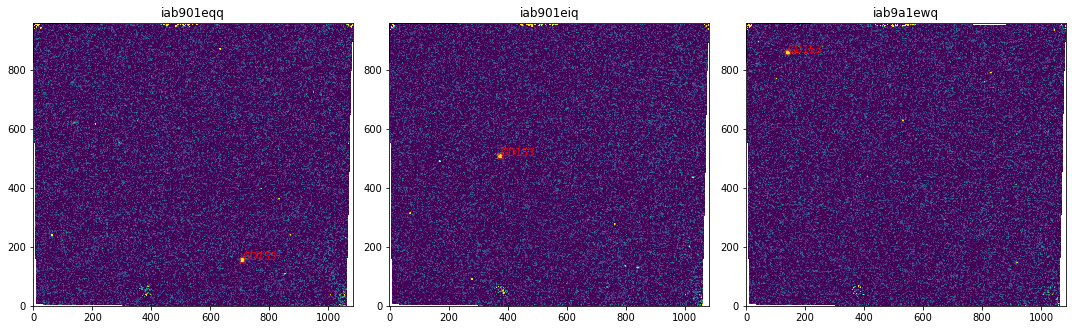

In [6]:
n = len(drzlist)
fig = plt.figure(figsize=(n*5,5))
for ii,i in enumerate(drzlist):
    ax = fig.add_subplot(1,n,ii+1)
    t = fits.open(i[2])[1].data
    ax.imshow(t,origin='lower',cmap='viridis',vmin=0,vmax=10)
    ax.set_title(i[0],fontsize=12)
    xyd = read_ds9region(ds9list[ii])[sourcename] - np.array([1.,1.])
    ax.scatter(*xyd,s=30,facecolor='None',edgecolor='red')
    ax.annotate(sourcename,xyd,color='red')
fig.tight_layout()
    

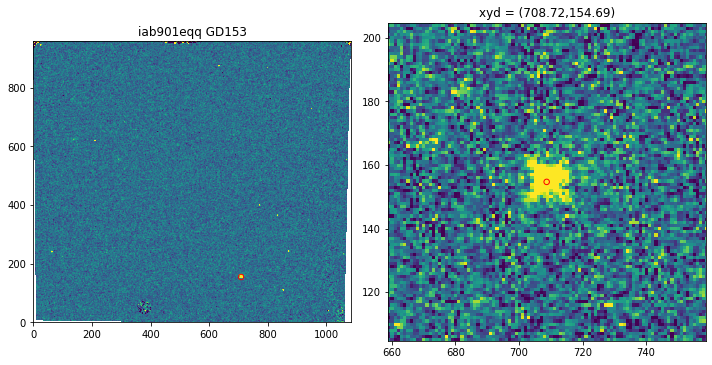

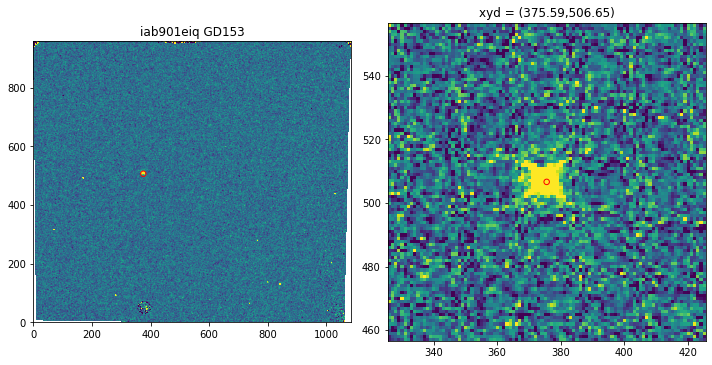

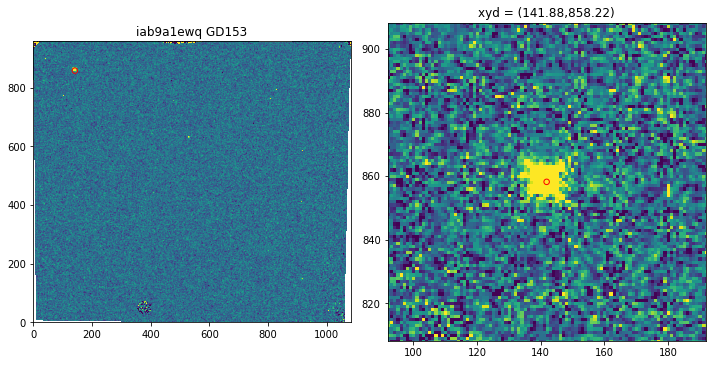

In [7]:
##########
# use show_source
##########
for ii,i in enumerate(drzlist):
    dfile = (i[2],1)
    xyd = read_ds9region(ds9list[ii])[sourcename] - np.array([1,1])
    title = '{0} {1}'.format(i[0],sourcename)
    show_source(dfile,xyd,title,save=False)
    

# 3. Make cutout2d, objectmask, background estimation, and replacement to full frame

For WFC3/IR, circular aperture radius of 1.5" would collect > 95% of light. WFC3/IR scale = 0.13"/pix. This is equivalent to > 11.5 pix for circular aperture radius.

Let's make:
- cutsize 20
- object mask 15


In [8]:
##########
# make container
##########
containerlist = []
for i in drzlist:
    sp = i[0]
    sf = i[0]
    containerobj = Container(sp,sf,'pdf',False)
    containerlist.append(containerobj)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstphot/container.py:31: UserWarning: Folder iab901eqq already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)
/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstphot/container.py:31: UserWarning: Folder iab901eiq already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)
/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstphot/container.py:31: UserWarning: Folder iab9a1ewq already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


Save ./iab901eqq/iab901eqq_cutout.pdf
Save ./iab901eqq/iab901eqq_bbcorner.csv
Save ./iab901eqq/iab901eqq_cutout.fits
Save ./iab901eqq/iab901eqq_mask.fits
Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,40.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,40.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (-25.6120662689209,6822.068359375) : scale_minmax = (-1.0,1.0) : method = linear
Rescale = False
Perform fit
Perform compute
Sigma clipping = False
Save ./iab901eqq/iab901eqq_cutbkg.fits
Save ./iab901eqq/iab901eqq_maskfit.fits
Save ./iab901eiq/iab901eiq_cutout.pdf
Save ./iab901eiq/iab901eiq_bbcorner.csv
Save ./iab901eiq/iab901eiq_cutout.fits
Save ./iab901eiq/iab901eiq_mask.fits
Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,40.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,40.0) : scale_minmax = (-1.0,1.0) 

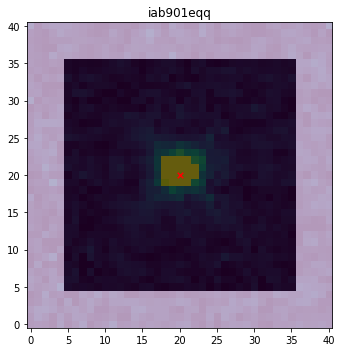

<Figure size 432x288 with 0 Axes>

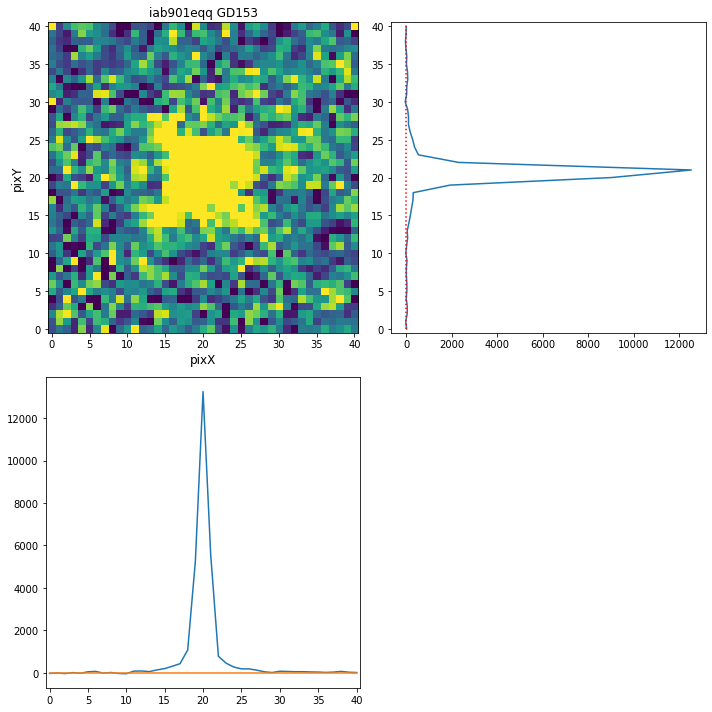

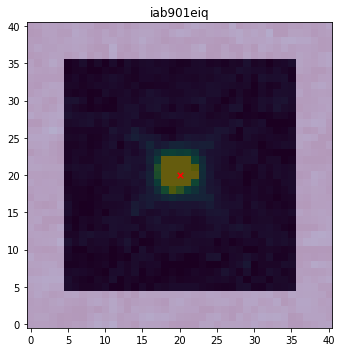

<Figure size 432x288 with 0 Axes>

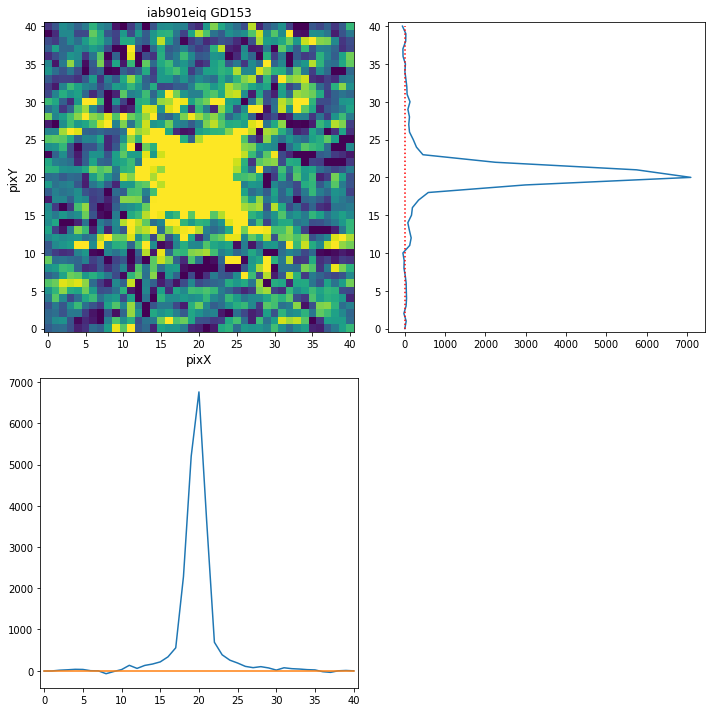

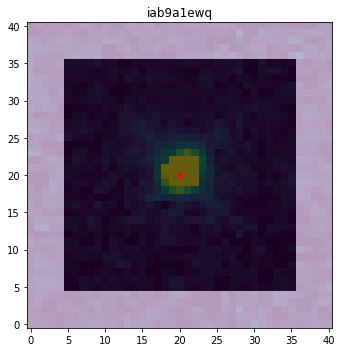

<Figure size 432x288 with 0 Axes>

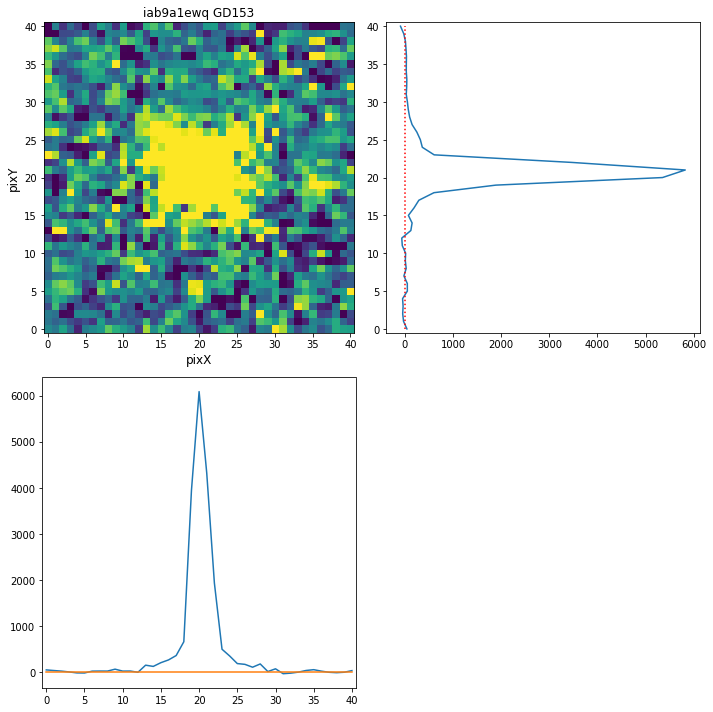

In [9]:
##########
# make cutout2d and objectmask and background estimation
# replace background to full frame
##########
dx_cut,dy_cut = 20,20
dx_mask,dy_mask = 15,15
norder = 0
for ii,i in enumerate(drzlist):
    data = fits.open(i[2])[1].data
    center = read_ds9region(ds9list[ii])[sourcename] - np.array([1.,1.]) + xyd_adjust[ii]
    ##### cutout #####
    cutoutobs = Cutout2d(data,center,dx_cut,dy_cut)
    cutoutobs.show(title=i[0],save=True,container=containerlist[ii])
    ##### objmask #####
    tdata = cutoutobs.cut
    tcenter = center - np.array([cutoutobs.bb0x,cutoutobs.bb0y])
    objmaskobj = ObjectMask(tdata,tcenter,dx_mask,dy_mask)
    objmaskobj.compute()
    objmaskobj.save(containerlist[ii])
    plt.imshow(objmaskobj.mask,origin='lower',cmap='Greys',alpha=0.6)
    ##### bkg #####
    gdata = cutoutobs.cut
    mdata = objmaskobj.mask
    bkgobj = Background(gdata,norder,mdata,container=containerlist[ii])
    bkgobj.poly2d.fit()
    bkgobj.save()
    ##### use show_sum1d #####
    plt.figure()
    gdata = cutoutobs.cut - bkgobj.poly2d.model['YFIT']
    objname = '{0} {1}'.format(i[0],sourcename)
    show_sum1d(gdata,objname,save=False)
    

# 4. Extraction and calibration

In [10]:
# Kornpob Bhirombhakdi
# kbhirombhakdi@stsci.edu

from photutils import CircularAperture
from photutils import aperture_photometry
from photutils.utils import calc_total_error
from hstphot.photapcorr import PhotApCorr
import numpy as np

class ApPhot:
    """
    ApPhot is a class to perform circular aperture photometry. The code uses photutils, and follows closely to its instruction (https://photutils.readthedocs.io/en/stable/aperture.html).
    - data = 2D image to be measured
    - filterobs = photometric filter (e.g., F140W)
    - instrument = instrument identifier. Instantiate a mock ApPhot() and use self.available_instrument to check available instrument.
    - self.center = (pixX,pixY) of centroid
    - aperture_radius = aperture radius in pixel unit
    - ebkg = error of background component to be added to poisson error from the data component. If None, set to zero.
    - effgain = effective gain. If data is in count/sec, effective gain is exposure time. If None, set to one.
    
    """
    def __init__(self,data,filterobs,instrument,center,aperture_radius,aperture_unit='pix',ebkg=None,effgain=None):
        self.data = data
        self.filterobs = filterobs
        self.instrument = instrument
        self.center = center
        self.aperture_radius = aperture_radius
        self.aperture_unit = aperture_unit
        self.ebkg = ebkg if ebkg is not None else np.full_like(data,0.,dtype=float)
        self.effgain = effgain if effgain is not None else 1.
        self.available_instrument = self._available_instrument()
        self.available_table = self._available_table()
    def _available_instrument(self):
        return PhotApCorr().available_instrument
    def _available_table(self):
        return PhotApCorr().available_table
    def compute(self,do_error=True,error=None,
                do_apphot=True,
                do_photcorr=True,
                do_mag=True
               ):
        if do_error:
            self.error = calc_total_error(self.data,self.ebkg,self.effgain)
        else:
            if error is not None:
                self.error = error 
            else :
                raise ValueError('error must be specified if do_error=False')
        if do_apphot:
            self.apphot = {}
            if self.aperture_unit != 'pix':
                raise ValueError('Only aperture_unit = "pix" is available to do_apphot = True')
            aperture = CircularAperture(self.center,r=self.aperture_radius)
            phottab = aperture_photometry(self.data,aperture,error=self.error)
            self.apphot = {'aperture':aperture,'phot_table':phottab}
        if do_photcorr:
            string = 'instrument must be specified to do_photcorr = True'
            apcorr = PhotApCorr(self.instrument) 
            apcorr.apsize = self.aperture_radius * apcorr.table['scale']
            try:
                apcorr.wave,zp = apcorr.table['ZP'][self.filterobs]
            except:
                string = 'available filterobs given instrument = {0} includes {1}'.format(self.instrument,apcorr.table['ZP'].keys())
                raise ValueError(string)
            apcorr.compute()
            self.apcorr = apcorr.apcorr[0]
            self.wavelength = apcorr.wave
            self.ZP = zp
        if do_mag:
            mag = -2.5 * np.log10(self.apphot['phot_table']['aperture_sum'] / self.apcorr) + self.ZP
            emag = 2.5 * np.sqrt(self.apphot['phot_table']['aperture_sum_err']**2) / (self.apphot['phot_table']['aperture_sum'] * np.log(10.))        
            self.mag = (mag[0],emag[0])
        

In [11]:
aprad = 12
instrument = 'HST-WFC3-IR'
mag = []
for ii,i in enumerate(drzlist):
    th = fits.open(i[2])[0].header
    efg = th['EXPTIME']
    filterobs = th['FILTER']
    string = './{0}/{0}'.format(i[0])
    gdata = fits.open(string+'_cutout.fits')[1].data - fits.open(string+'_cutbkg.fits')[1].data
    bbcorner = pd.read_csv(string+'_bbcorner.csv')
    center = read_ds9region(ds9list[ii])[sourcename] - np.array([1.,1.]) + xyd_adjust[ii] - np.array([bbcorner.bbx[0],bbcorner.bby[0]])
    t = ApPhot(data=gdata,filterobs=filterobs,instrument=instrument,center=center,aperture_radius=aprad,effgain=efg)
    t.compute()
    mag.append(t)
    print(i[0],mag[ii].mag)


iab901eqq (14.509924237543489, 0.002672461699678146)
iab901eiq (14.825157257726152, 0.003093697767681176)
iab9a1ewq (14.913161351912562, 0.0032280936186406075)


# Check with pysynphot

In [12]:
import pysynphot as S

In [13]:
# for i in flist:
#     tmp = flist[i]['phot']
#     tmpp = {}
#     tmpp['filter'] = tmp['filter'].values
#     tmppp = []
#     for j in tmp['filter'].values:
#         if j in {'F606W','F814W'}:
#             string = 'wfc3,uvis1,{0}'.format(j.lower())
#         else:
#             string = 'wfc3,ir,{0}'.format(j.lower())
#         tmppp.append(string)
#     tmpp['bp'] = np.array(tmppp)
#     flist[i]['pysynphot'] = pd.DataFrame(tmpp)
# flist


In [14]:
# dateobs = '201909XX'
# force = 'extrap'
# # force = 'taper'
# # force = None
# ##### pysynphot setup
# i = dateobs
# tmp = flist[i]['sdf']
# bp = flist[i]['pysynphot']['bp'].values
# tmpx,tmpy,m = tmp.LAMBDA.values,tmp.FLUX.values,tmp.MASKGOOD.values
# tmpx,tmpy = tmpx[m],tmpy[m]
# spc = S.ArraySpectrum(tmpx,tmpy,fluxunits='flam',keepneg=True)
# tmppx = []
# tmppy = []
# for j in bp:
#     obs = S.Observation(spc,S.ObsBandpass(j),force=force)
#     tmppx.append(obs.efflam())
#     tmppy.append(obs.effstim('flam'))
# flist[i]['pysynphot']['wavelength'] = np.array(tmppx)
# flist[i]['pysynphot']['flam'] = np.array(tmppy)
# ##### show
# i = dateobs
# tmp = flist[i]['sdf']
# tmpx,tmpy,m = tmp.LAMBDA.values,tmp.FLUX.values,tmp.MASKGOOD.values
# tmpx,tmpy = tmpx[m],tmpy[m]
# plt.figure(figsize=(10,10))
# plt.plot(tmpx,tmpy,':',alpha=0.4)
# plt.title(i,fontsize=12)
# plt.xlabel('obs. wavelength (A)',fontsize=12)
# plt.ylabel('flam',fontsize=12)
# plt.tight_layout()

# tmp = flist[i]['phot']
# tmpx,tmpy,tmpey = tmp.wavelength.values,tmp.mag.values,tmp.emag.values
# tmpy,tmpey = mag2flux(tmpy,tmpey,tmpx)
# plt.errorbar(tmpx,tmpy,tmpey,marker='o',ls='-',label='phot')

# tmp = flist[i]['pysynphot']
# tmpx,tmpy = tmp.wavelength.values,tmp.flam.values
# plt.plot(tmpx,tmpy,'x-',label='pysynphot, force = {0}'.format(force))

# plt.legend(fontsize=10)
# string = '{0}_pysyn01.pdf'.format(i)
# plt.savefig(string,format='pdf',bbox_inches='tight')


# Summary
At the end of the day, we ended at unfinished finalizing this task, and updating HSTPHOT wich ApPhot class. More things to continue:
- [INS training](https://innerspace.stsci.edu/display/INSTL) covers topic about photometry, drizzling, and pysynphot. Check that first because a couple of issues remain here...
 - aperture correction -- does it apply to flt or drz?
 - emag -- currently in ApPhot will compute poisson error from data component, which supposed to be the cleaned data. However, the original poisson error is what it should be here. Although ebkg can be calibrated to accommodated both background error component and the correction, the training might lead to a better way.
 - we would like to perform pysynphot here for a check with GD153
- Currently, F098M of GD153 using here show about 0.5 mag variation across the field. This looks incorrect.
- After checking with INS training, and GD153 true value and spread across the field of view, make correction to ApPhot and package it. Make sure to check the error calculation, and how to handling background error component properly.
